In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data_dir='D:\\Msc GU\\Msc 4th Sem\\Project\\DataSet\\teadataset'

In [4]:
# Set up data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Load in the dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [5]:
batch_size=32

In [9]:
base_model = tf.keras.applications.NASNetMobile(
    input_shape=(224, 224, 3),
    include_top=False)

# Freeze all but the last few layers of the base model
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Add some layers on top of the pre-trained model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(8, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history = model.fit(
    train_data,
    steps_per_epoch=train_data.n// batch_size,
    epochs=50,
    validation_steps=val_data.n// batch_size,
    validation_data=val_data)


Epoch 1/50
22/22 [==============================] - 234s 9s/step - loss: 1.8455 - accuracy: 0.2916 - val_loss: 1.2862 - val_accuracy: 0.5437
Epoch 2/50
22/22 [==============================] - 184s 9s/step - loss: 1.1826 - accuracy: 0.5611 - val_loss: 1.1004 - val_accuracy: 0.5938
Epoch 3/50
22/22 [==============================] - 126s 6s/step - loss: 1.0331 - accuracy: 0.5994 - val_loss: 0.9507 - val_accuracy: 0.6562
Epoch 4/50
22/22 [==============================] - 91s 4s/step - loss: 0.8908 - accuracy: 0.6524 - val_loss: 0.9061 - val_accuracy: 0.6187
Epoch 5/50
22/22 [==============================] - 92s 4s/step - loss: 0.7932 - accuracy: 0.6878 - val_loss: 0.9026 - val_accuracy: 0.6062
Epoch 6/50
22/22 [==============================] - 132s 6s/step - loss: 0.7569 - accuracy: 0.7261 - val_loss: 0.8816 - val_accuracy: 0.6187
Epoch 7/50
22/22 [==============================] - 180s 8s/step - loss: 0.6843 - accuracy: 0.7349 - val_loss: 0.9354 - val_accuracy: 0.6500
Epoch 8/50
22/2

In [10]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()



In [16]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [17]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 58s 3s/step - loss: 0.4465 - accuracy: 0.8333
Test Loss: 0.44654977321624756
Test Accuracy: 0.8333333134651184


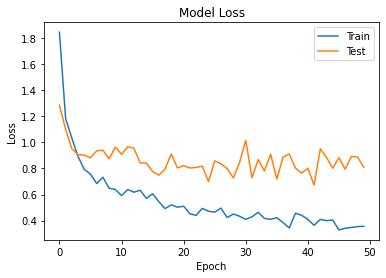

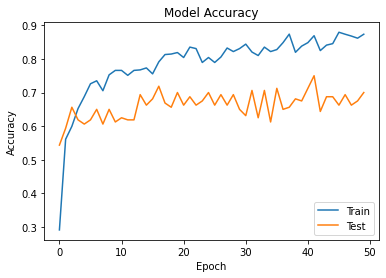

In [15]:
plot_loss(history)
plot_accuracy(history)